In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf 
from scipy.interpolate import interp1d
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler

In [2]:
make a table of the data
 2021-2022   2022-2023    2023-2024 (1 april 2023 - 31 march 2024)
17,215.2	18,020.5	19,138.2

SyntaxError: invalid syntax (1183382220.py, line 1)

In [3]:

                2018-19         2019-20 2020-21
Health and Sport	13,583.8	14,311.1	15,327.9

SyntaxError: invalid syntax (3680730103.py, line 1)

In [ ]:
2016-2017   2017-2018    2015-2016
13,023.0	13,210.6        12,455,449,000

In [7]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)
# drop uncessary columns drop also country cos its only scotland and like everything is the same and id too cos like useless yk
cancellations_scotland.drop(columns=["_id","Country","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_scotland["Month"] = pd.to_datetime(cancellations_scotland.Month, format="%Y%m")
# change the month format to a much better data type

def get_season(x):
    match x.month:
        case 12 | 1 | 2:
            return "Winter"
        case 3 | 4 | 5:
            return "Spring"
        case 6 | 7 | 8:
            return "Summer"
        case 9 | 10 | 11:
            return "Autumn"
        
cancel_scotland = cancellations_scotland.copy(True)
cancel_scotland["Season"] = cancellations_scotland["Month"].apply(get_season)
cancel_scotland

,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season
0,2015-05-01,28810,2695,1057,853,523,262,Spring
1,2015-06-01,30941,2800,1194,870,449,287,Summer
2,2015-07-01,27725,2642,1083,854,457,248,Summer
3,2015-08-01,28948,2630,1080,912,491,147,Summer
4,2015-09-01,30938,2829,1122,1000,535,172,Autumn
...,...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87,Autumn
101,2023-10-01,24201,2286,775,797,580,134,Autumn
102,2023-11-01,25922,2277,737,820,582,138,Autumn
103,2023-12-01,20837,2014,677,725,515,97,Winter


In [8]:
2015	5.4	0.93%
2016	5.422	0.41%
2017	5.43	0.15%
2018	5.45	0.37%
2019	5.47	0.37%
2020	5.494	0.45%
2021	5.515	0.38%
2022	5.54	0.45%
2023	5.56	0.36%


,_id,Year,HB,HBQF,Sex,SexQF,AllAges,Age0,Age1,Age2,...,Age81,Age82,Age83,Age84,Age85,Age86,Age87,Age88,Age89,Age90plus
0,1,1981,S92000003,d,All,d,5180200,68529,66723,64065,...,19381,15848,13647,11778,10157,8229,6795,5579,4339,13571
1,2,1981,S92000003,d,Female,NaN,2685340,33266,32581,30995,...,13650,11349,10014,8759,7686,6187,5156,4329,3371,10859
2,3,1981,S92000003,d,Male,NaN,2494860,35263,34142,33070,...,5731,4499,3633,3019,2471,2042,1639,1250,968,2712
3,4,1981,S08000015,NaN,All,d,377854,5036,4863,4764,...,1334,1084,1000,807,693,539,432,378,276,821
4,5,1981,S08000015,NaN,Female,NaN,196774,2446,2378,2264,...,928,774,746,597,496,401,304,297,213,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1841,2021,S08000031,NaN,Female,NaN,607878,5062,5350,5707,...,3426,3370,3096,2903,2622,2455,2206,1877,1706,6428
1841,1842,2021,S08000031,NaN,Male,NaN,577162,5380,5645,5904,...,2232,2199,1995,1849,1547,1385,1099,948,844,2673
1842,1843,2021,S08000032,NaN,All,d,664030,6232,6402,6770,...,3501,3325,3129,2724,2547,2106,1772,1599,1299,4398
1843,1844,2021,S08000032,NaN,Female,NaN,342339,3020,3142,3340,...,2045,1962,1806,1687,1583,1359,1122,986,837,3063


In [23]:
cancel_scotland
cancel_scotland["percentage"] = cancel_scotland["TotalCancelled"] / cancel_scotland["TotalOperations"] * 100

In [24]:
cancel_scotland

,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season,percentage
0,2015-05-01,28810,2695,1057,853,523,262,Spring,9.354391
1,2015-06-01,30941,2800,1194,870,449,287,Summer,9.049481
2,2015-07-01,27725,2642,1083,854,457,248,Summer,9.529306
3,2015-08-01,28948,2630,1080,912,491,147,Summer,9.085256
4,2015-09-01,30938,2829,1122,1000,535,172,Autumn,9.144095
...,...,...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87,Autumn,9.069757
101,2023-10-01,24201,2286,775,797,580,134,Autumn,9.445891
102,2023-11-01,25922,2277,737,820,582,138,Autumn,8.784044
103,2023-12-01,20837,2014,677,725,515,97,Winter,9.665499


Text(0, 0.5, 'Operations (Log)')

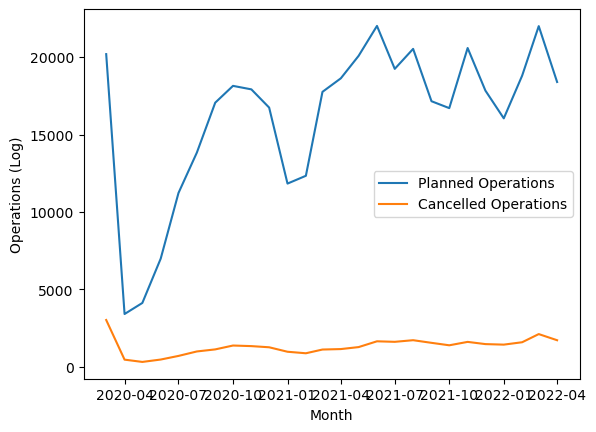

In [30]:
cancellations_scotland_aftercovid = cancel_scotland[(cancel_scotland["Month"] >= np.datetime64("2020-02-26")) & (cancel_scotland["Month"] <= np.datetime64("2022-04-30"))]
sns.lineplot(data=cancellations_scotland_aftercovid, x="Month", y="TotalOperations", label="Planned Operations")
sns.lineplot(data=cancellations_scotland_aftercovid, x="Month", y="TotalCancelled", label="Cancelled Operations")
plt.ylabel("Operations (Log)")

<Axes: xlabel='Month', ylabel='percentage'>

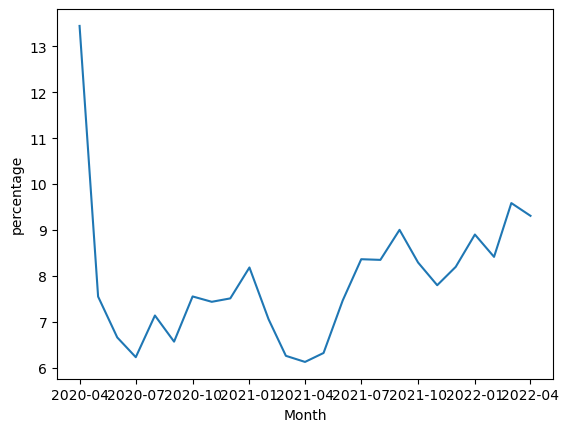

In [28]:
sns.lineplot(x=cancellations_scotland_aftercovid["Month"], y=cancellations_scotland_aftercovid["percentage"])